In [ ]:
# Reading colab file in drive
from google.colab import drive
from tqdm import tqdm
drive.mount("/content/drive")
%cd '/content/drive/My Drive/Research/Philantrophy Research'

# importing the neccessary files
import pandas as pd
import ast
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import string

Mounted at /content/drive
/content/drive/My Drive/Research/Philantrophy Research


# Overall Tweets

In [ ]:
df = pd.read_csv("Orphan_tweets_COVID-19.csv")
# Removing punctuation and special characters
df["text"] = df['text'].str.replace('[^A-Za-z ]','',regex=True)
# removing orphans and orphanages because we already know that orphans and orphanages will be the most 'popular' words given that they were primarily used to extract our Tweets
df["text"] = df['text'].str.replace('orphan','') 
df["text"] = df['text'].str.replace('orphanage','')
df["text"]=df["text"].str.replace('[{}]'.format(string.punctuation), '')
# removing single words (example 'I', 'a', 'u')
df["text"]=df['text'].str.replace(r'\b\w{1,1}\b', '', regex=True)

# removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-2-faac2e156436>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"]=df["text"].str.replace('[{}]'.format(string.punctuation), '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# performing Lemmatization to ensure only Lemmas of words appear in the wordcloud. 

# importing nltk files needed for lemmatization
from nltk.stem import WordNetLemmatizer 
from tqdm import tqdm
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import math
import nltk
nltk.download('omw-1.4')


# Set a function to perform lemmatization

def lemmatize(selected_reviews):

  # including pos-tagging here. 
  def get_wordnet_pos(word):
      """Map POS tag to first character lemmatize() accepts"""
      tag = nltk.pos_tag([word])[0][1][0].upper()
      tag_dict = {"J": wordnet.ADJ,
                  "N": wordnet.NOUN,
                  "V": wordnet.VERB,
                 "R": wordnet.ADV}
      return tag_dict.get(tag, wordnet.NOUN)

  # Lemmatization take place here 
  lemmatizer = WordNetLemmatizer() 
  lemmatized_reviews=[]
  for i in tqdm(range(0, len(selected_reviews))):
    new_list_sentence = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(str(selected_reviews[i]))]
    lemmatized_output = ' '.join([w for w in new_list_sentence])
    lemmatized_reviews.append(lemmatized_output)
  return(lemmatized_reviews)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# executing the lemmatization function above
df["text"]=lemmatize(list(df["text"]))

100%|██████████| 415/415 [00:08<00:00, 51.12it/s] 


100%|██████████| 415/415 [00:00<00:00, 36447.77it/s]


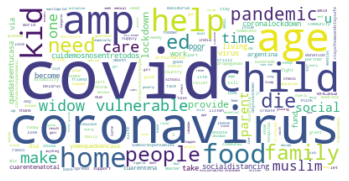

In [ ]:
# Placing it in a list
text = " ".join([str(df.text[i]) for i in tqdm(range(len(df)))])
# making the word cloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()